In [19]:
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
import random

from pathlib import Path
from PIL import Image


from detectron2.data.datasets import register_coco_instances, load_coco_json
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer
from itertools import chain

from matplotlib.patches import Rectangle

In [9]:
def cv2_imshow(a):
    """
    A replacement for cv2.imshow() for use in Jupyter notebooks.
    Args:
    
    a : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
      (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
      image.
    """
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    return(a)

In [3]:
coco_annotations_train_json = Path("/home/nilscp/tmp/preprocessing/json/Censorinus-M139694087LE-v001-train-annotations-coco-format.json")
coco_annotations_validation_json = Path("/home/nilscp/tmp/preprocessing/json/Censorinus-M139694087LE-v001-validation-annotations-coco-format.json")
coco_annotations_test_json = Path("/home/nilscp/tmp/preprocessing/json/Censorinus-M139694087LE-v001-test-annotations-coco-format.json")

In [4]:
images_train = Path("/home/nilscp/tmp/preprocessing/preprocessing/train/images")
images_validation = Path("/home/nilscp/tmp/preprocessing/preprocessing/validation/images")
images_test = Path("/home/nilscp/tmp/preprocessing/preprocessing/test/images")

In [5]:
register_coco_instances("censorinus_train_draft", {}, coco_annotations_train_json, images_train)
register_coco_instances("censorinus_validation_draft", {}, coco_annotations_validation_json, images_validation)
register_coco_instances("censorinus_test_draft", {}, coco_annotations_test_json, images_test)

In [6]:
MetadataCatalog.get("censorinus_train_draft")

namespace(name='censorinus_train_draft',
          json_file=PosixPath('/home/nilscp/tmp/preprocessing/json/Censorinus-M139694087LE-v001-train-annotations-coco-format.json'),
          image_root=PosixPath('/home/nilscp/tmp/preprocessing/preprocessing/train/images'),
          evaluator_type='coco')

In [7]:
for i in ["censorinus_train_draft", "censorinus_validation_draft", "censorinus_test_draft"]:
    MetadataCatalog.get(i).set(thing_classes=["boulder"])
    
boulder_metadata = MetadataCatalog.get("censorinus_train_draft")

In [8]:
MetadataCatalog.get("censorinus_train_draft")

namespace(name='censorinus_train_draft',
          json_file=PosixPath('/home/nilscp/tmp/preprocessing/json/Censorinus-M139694087LE-v001-train-annotations-coco-format.json'),
          image_root=PosixPath('/home/nilscp/tmp/preprocessing/preprocessing/train/images'),
          evaluator_type='coco',
          thing_classes=['boulder'])

In [10]:
# Opening JSON file
with open(coco_annotations_train_json) as f:
    train_data = json.load(f)

Two solutions either go through 

In [ ]:
load_coco_json(json_file, image_root, dataset_name=None, extra_annotation_keys=None)

In [13]:
train_data_2 = load_coco_json(coco_annotations_train_json, images_train, "censorinus_train_draft")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Does this message means that category id should shart at 1!? 

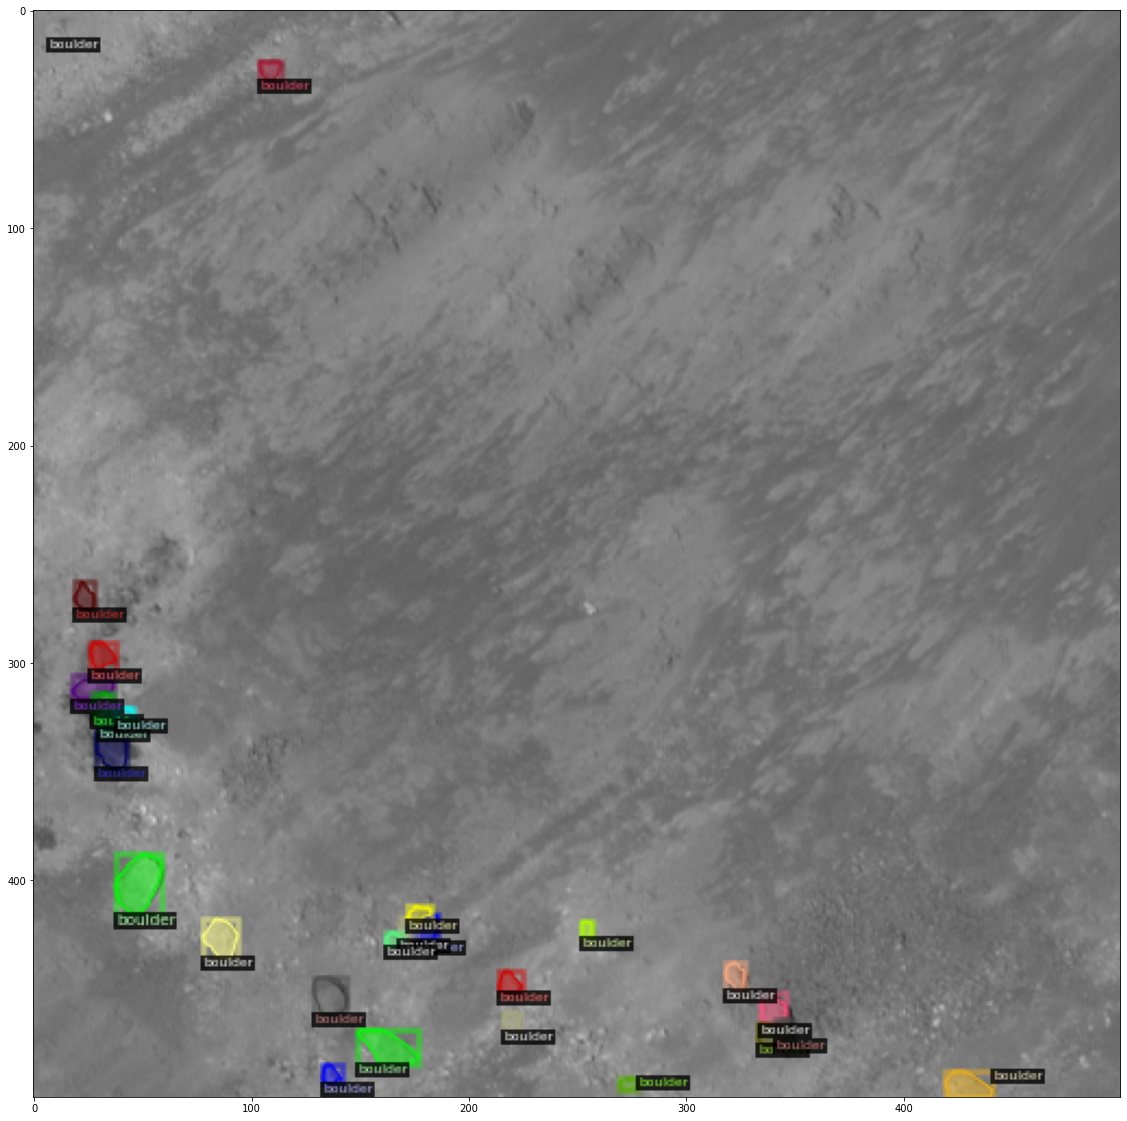

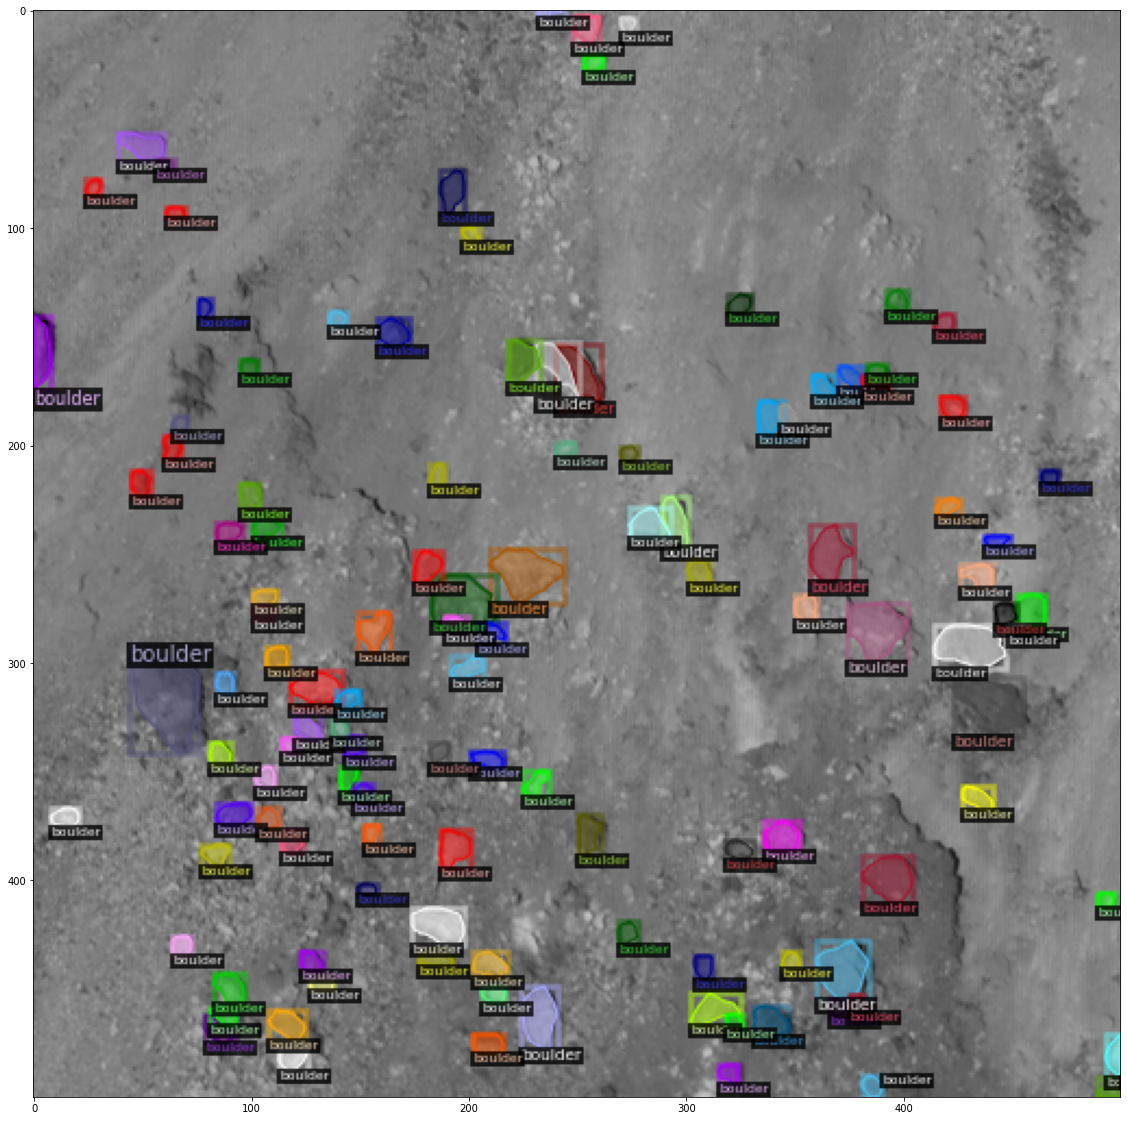

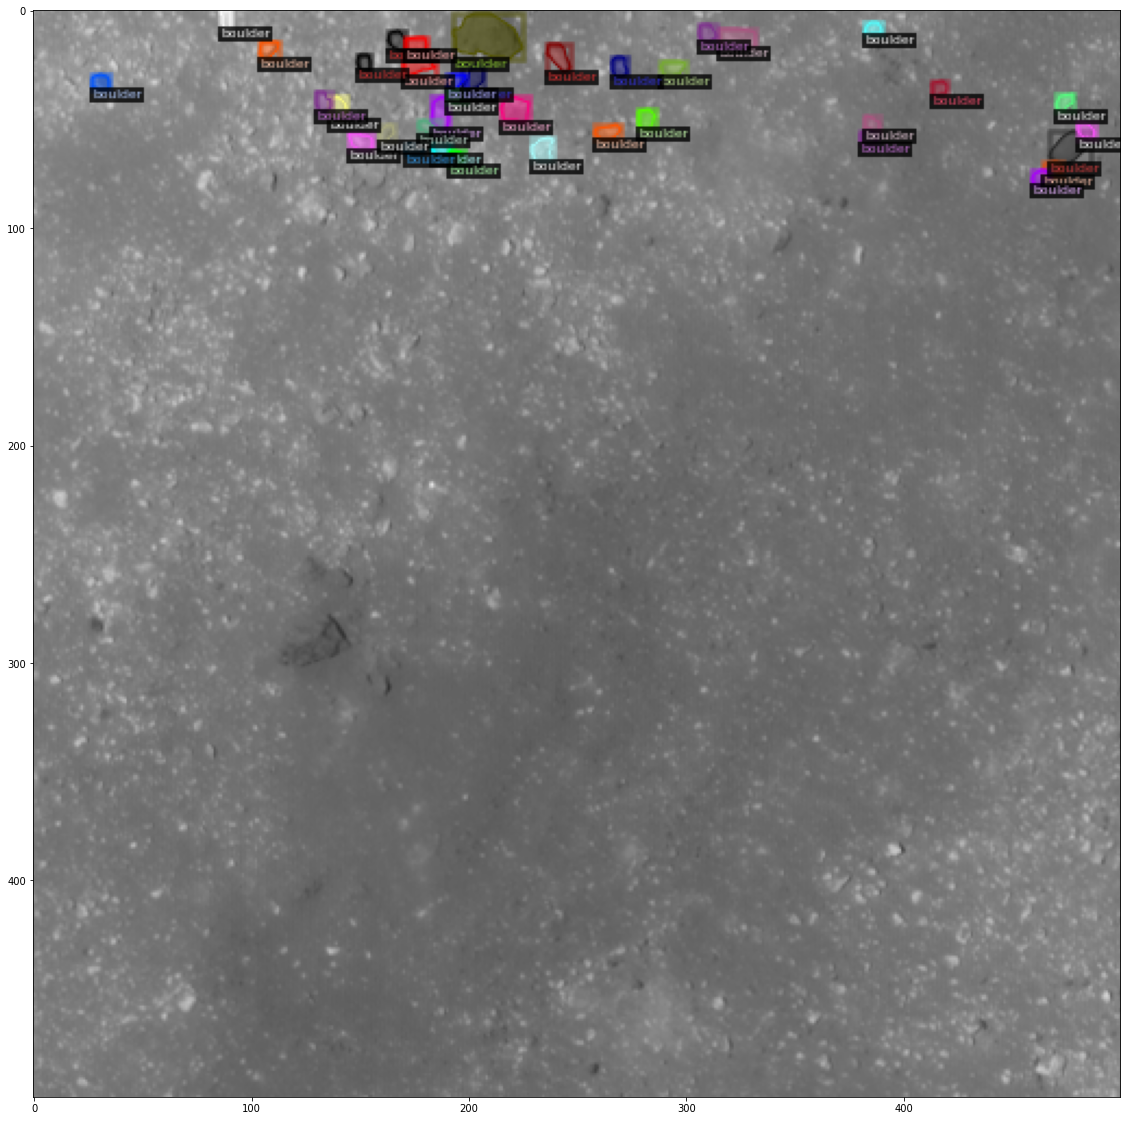

In [22]:
for d in random.sample(train_data_2, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=boulder_metadata, scale=1.0)
    out = visualizer.draw_dataset_dict(d)
    a = cv2_imshow(out.get_image()[:, :, ::-1])
    plt.figure(figsize=(20,20))
    plt.imshow(a)